In [23]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [24]:
#initializations as per data 

theta = 15*np.pi/180
UB = 100 #upperbound
LB = 10  #lowerbound

mass = 0.1
max_tension = 2
h = 0.1
p_feas = 0
t_feas = 0
g = np.array([0,-9.8]).reshape((2,1))
orientation = np.array([[- np.sin(theta), np.sin(theta) ], [ np.cos(theta), np.cos(theta) ]])
p_init = np.array([0,0])
p_des = np.array([10,2])

In [25]:
while not LB + 1 == UB:
  k = int((UB + LB)/2.0)
  velocity = cp.Variable((2,k))
  Tension = cp.Variable((2,k-1))
  position = cp.Variable((2,k))

  F = cp.matmul(orientation,Tension) + mass*np.tile(g,(1,k-1))

  constraints = [0 <= Tension, Tension <= max_tension, position[:,0] == p_init, position[:,k-1] == p_des, velocity[:,0] == 0 , velocity[:,k-1] == 0
                , position[:,1:k] == position[:,0:k-1] + h*velocity[:,0:k-1], velocity[:,1:k] == velocity[:,0:k-1] + (h/mass)*F]

  cv_prob = cp.Problem(cp.Minimize(0),constraints)
  optimum = cv_prob.solve()

  if optimum == 0:
    UB = k
    p_feas = position.value
    t_feas = Tension.value
  else :
    LB = k

k = UB
print('K Minimum : ', k)

K Minimum :  34


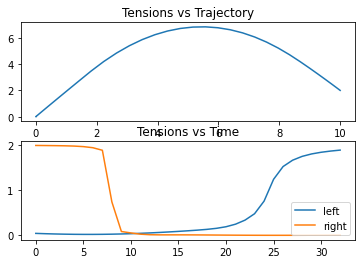

In [26]:
plt.subplot(2,1,1)
plt.plot(p_feas[0,:].T,p_feas[1,:].T)
plt.title('Tensions vs Trajectory')
plt.subplot(2,1,2)
plt.plot(t_feas[0,:].T,label='left')
plt.plot(t_feas[1,:].T,label='right')
plt.legend()
plt.title('Tensions vs Time')
plt.show()